In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Weekly.csv')

data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
#新建一列，把y变成一个dummy(0,1)
data.loc[(data["Direction"]=="Up"),"Target"] = 1
data.loc[(data["Direction"]=="Down"),"Target"] = 0

In [4]:
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Target
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0.0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0.0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1.0
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1.0
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1.0


## (a)

Use the full dataset to fit a logistic regression of today’s stock movement (up or down) on the
five lags of returns and the trading volume.


In [5]:
#选择很多列，用两个【【】】
X = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = data['Target']

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

## (b)

Calculate the confusion matrix, accuracy, precision, recall, and F1 score for the in-sample predic-
tions. Does the model uniformly beat random guessing in terms of these performance metrics

In [6]:
# Make predictions
y_pred = model.predict(X)

# 求混淆矩阵和一大堆评价指标
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

import pandas as pd
class_labels = ['Down', 'Up']

conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Down', 'Actual Up'], 
                              columns=['Predicted Down', 'Predicted Up'])


print("Confusion Matrix:\n", conf_matrix_df)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
              Predicted Down  Predicted Up
Actual Down              54           430
Actual Up                48           557
Accuracy: 0.5610651974288338
Precision: 0.5643363728470111
Recall: 0.9206611570247933
F1 Score: 0.6997487437185929


In [7]:
#求no information rate
class_counts = y.value_counts()

most_common_class_freq = class_counts.max() / class_counts.sum()

print("No information rate:", most_common_class_freq)

No information rate: 0.5555555555555556


Because 0.561>0.555, the logistic model works better than random guessing.

## (c)

On the same graph, plot precision and recall against the threshold (varying over [0, 1]) used to
generate predicted labels from predicted probabilities. Explain the pattern you see.

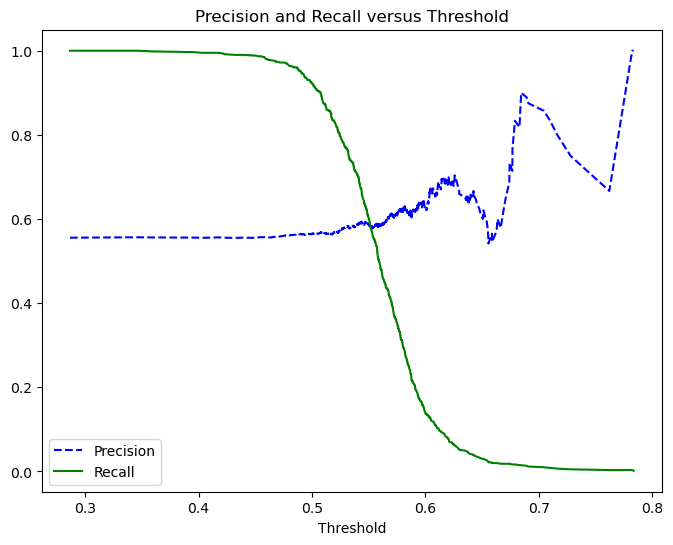

In [18]:
from sklearn.metrics import precision_recall_curve

# n*2 第一列是每个样本属于0的概率，第二列是每个样本属于1的概率
y_scores = model.predict_proba(X)[:, 1]

# y_scores: 预测概率数组，包含模型预测每个样本为正类的概率。是反映了模型对于每个样本属于正类的置信度。

precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

# Plotting Precision-Recall curve
plt.figure(figsize=(8, 6))
# precision_recall_curve 函数返回的 precisions 和 recalls 数组比 thresholds 数组多出一个额外的元素
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.title("Precision and Recall versus Threshold")
plt.show()

When we raise the threshold, the recall rate decreases constantly since the accuracy of capturing positive labels decreases. Recall= True Positives (TP)\(True Positives (TP)+False Negatives (FN)). The numerator decreases while the denominator stays the same, so recall rate also decreases.

The precision rate fluctuates and finally goes up as we raises the threshold. This is because when we set threshold high enough,most of our predictions will be negative and when we predict positive, it is very likely to be true.



## (d)

Now fit the logistic regression using only data up to (and including) the year 2008, with Lag2 as
the only predictor

In [8]:
# Use only data up to 2008 and Lag2 as the predictor
data_up_to_2008 = data[data['Year'] <= 2008]
X_lag2 = data_up_to_2008[['Lag2']]
y_lag2 = data_up_to_2008['Target']

model_lag2 = LogisticRegression()
model_lag2.fit(X_lag2, y_lag2)

LogisticRegression()

## (e)

In [9]:
# Test data
test_data = data[data['Year'] > 2008]
X_test = test_data[['Lag2']]
y_test = test_data['Target']

# Predictions on test data
y_pred_test = model_lag2.predict(X_test)

# Evaluate
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

class_labels = ['Down', 'Up']

conf_matrix_test_df = pd.DataFrame(conf_matrix_test, 
                              index=['Actual Down', 'Actual Up'], 
                              columns=['Predicted Down', 'Predicted Up'])

print("Test Confusion Matrix:\n", conf_matrix_test_df)
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)

Test Confusion Matrix:
              Predicted Down  Predicted Up
Actual Down               9            34
Actual Up                 5            56
Test Accuracy: 0.625
Test Precision: 0.6222222222222222
Test Recall: 0.9180327868852459
Test F1 Score: 0.7417218543046358


## (f)

1.Accuracy:

Model 2 has a higher accuracy (62.50%) compared to Model 1 (56.11%). This means that overall, Model 2 makes more correct predictions for both 'Up' and 'Down' classes.

2.Precision:

Model 2 also has a higher precision (62.22%) than Model 1 (56.43%). This indicates that when Model 2 predicts the stock movement as 'Up', it is more likely to be correct than Model 1.

3.Recall:

Both models have high recall rates, with Model 2 slightly lower (91.80%) compared to Model 1 (92.07%). This suggests that both models are good at identifying the 'Up' class, but there's not much difference between them in this regard.

4.F1 Score:

Model 2 has a higher F1 score (74.17%) compared to Model 1 (69.97%). The F1 score balances precision and recall, and a higher value suggests a better overall performance, especially in cases where there's an imbalance in the performance of precision and recall.

5.Contextual Considerations:

In stock market prediction, both false positives and false negatives can have significant financial implications. A balance between precision and recall is often desirable.
Model 2's higher precision indicates fewer false positives (predicting 'Up' incorrectly), which could be crucial if the cost of wrongly predicting a rise in stock value is high.

Conclusion:

Based on the provided metrics, Model 2 seems to be the better choice. It not only has higher accuracy and precision but also maintains a high recall rate and a better F1 score. This suggests that Model 2 is more balanced in terms of both identifying the 'Up' class and minimizing incorrect 'Up' predictions.






